In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("~/heart.csv")

In [4]:
# Checking for missing values ,dtypes unique distrubutions
print("Dataset shape:", df.shape)
print("Datatypes:", df .dtypes)
print("Missing Values:", df.isnull().sum())
print("Unique Value Counts:",df.nunique())


Dataset shape: (303, 14)
Datatypes: age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
Missing Values: age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Unique Value Counts: age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64


In [5]:
# Detecting outliers using IQR
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
IQR = Q3 - Q1
outliers= ((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).sum()
print("Outliers per Column:", outliers)
print("Head:",df.head())
print("inf0:",df.info())
print(df.describe())
print("Null values:",df.isnull().sum())

Outliers per Column: age          0
sex          0
cp           0
trestbps     9
chol         5
fbs         45
restecg      0
thalach      1
exang        0
oldpeak      5
slope        0
ca          25
thal         2
target       0
dtype: int64
Head:    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Co

<function matplotlib.pyplot.show(close=None, block=None)>

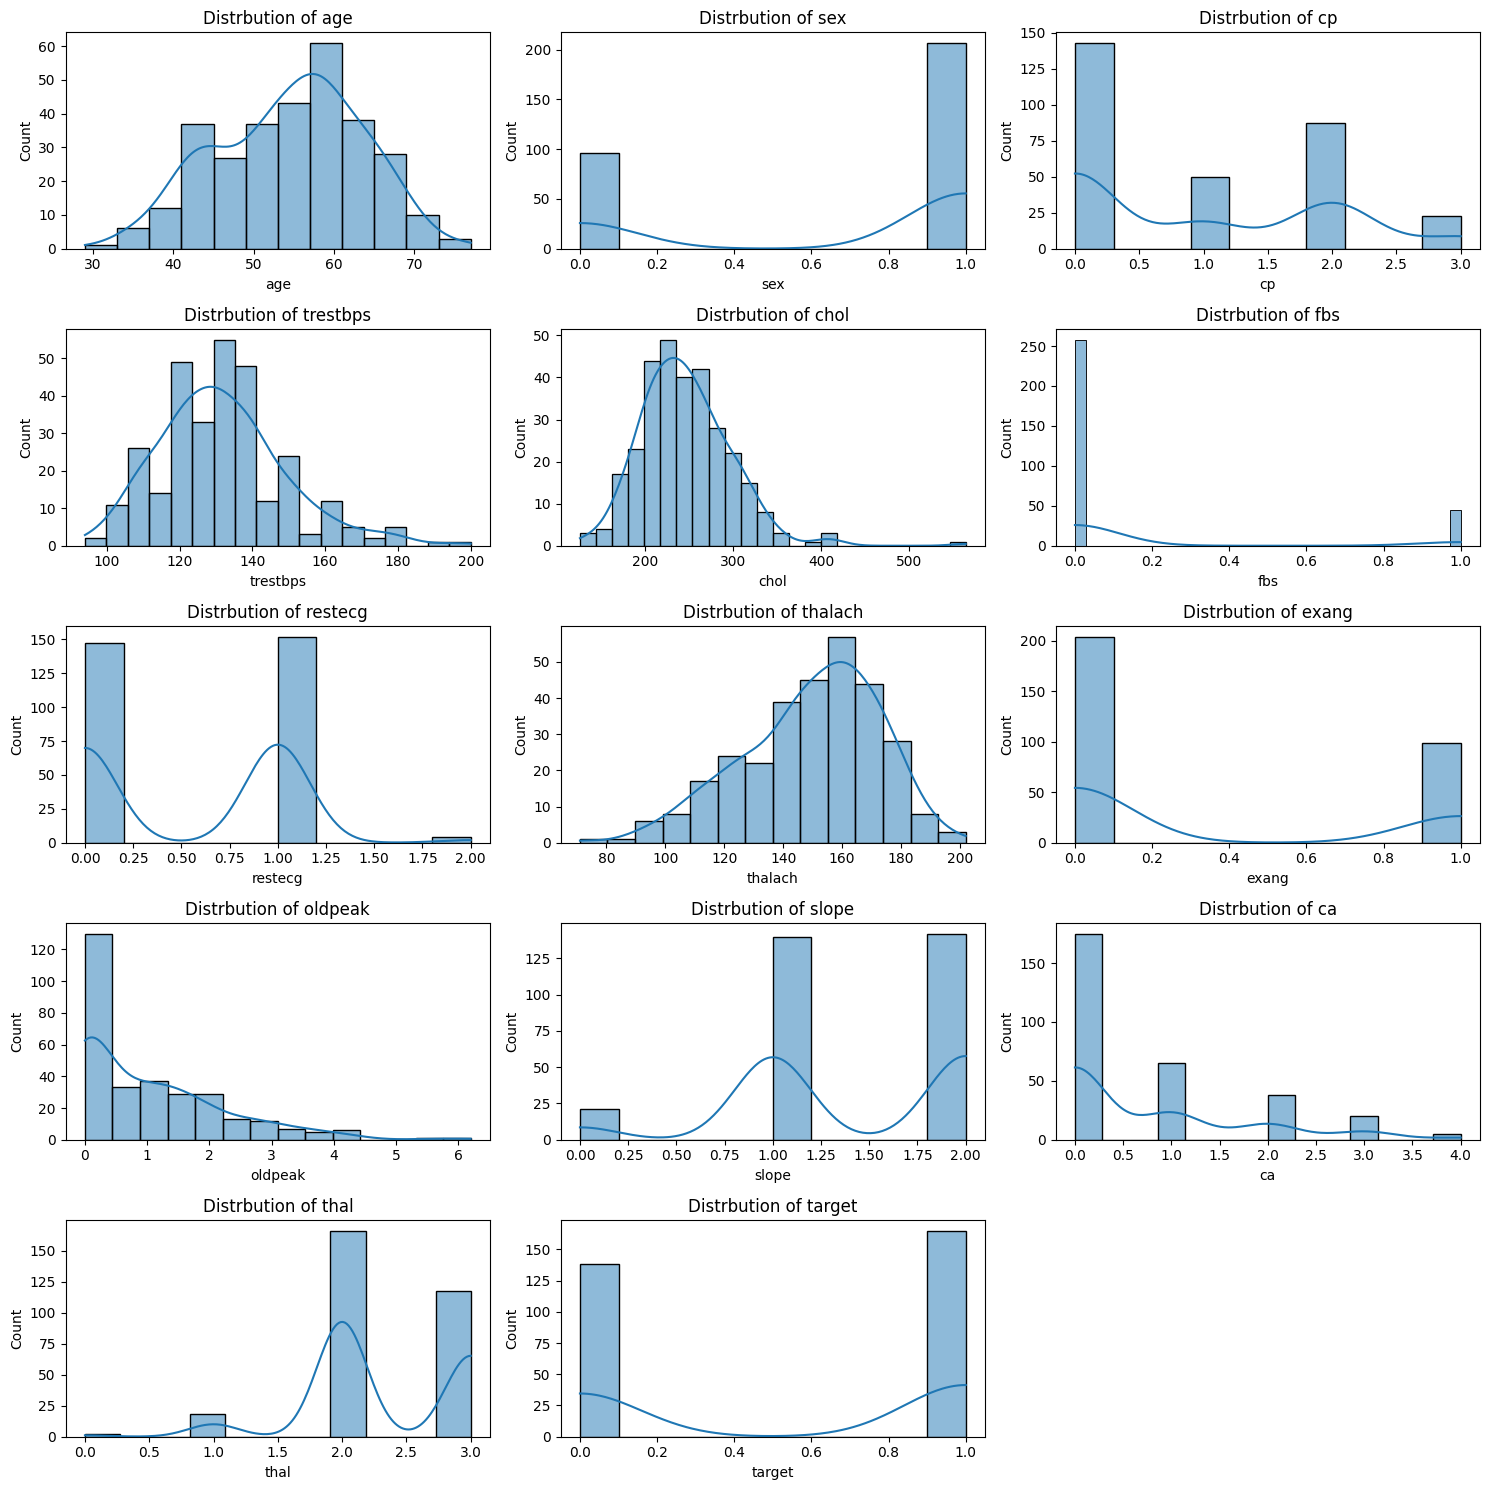

In [ ]:
# Distribution plots with KDE (kernel Density Estimate)overlays
num_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,15))
for i, col in enumerate(num_cols,1):
    plt.subplot(5,3,i)
    sns.histplot(df[col],kde=True)
    plt.title(f'Distrbution of {col}')
plt.tight_layout()
plt.show



In [1]:

# ---  Age(s) with the maximum cholesterol ---
max_chol = df['chol'].max()
ages_with_max_chol = df[df['chol'] == max_chol]['age'].unique()

print("Maximum cholesterol:", max_chol)
print("Age(s) with maximum cholesterol:", ages_with_max_chol)
# Plot and highlight ---
sns.lineplot(data=df, x='age', y='chol')

# Highlight the age(s) with max cholesterol
for age in ages_with_max_chol:
    plt.scatter(age, max_chol, color='red', s=100, label=f'Max Chol at age {age}')

plt.legend()
plt.show()

NameError: name 'df' is not defined